In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf



In [7]:
construction_df = pd.read_csv('construction_spending.csv')

In [8]:
construction_df.head(3)

,time.index,time.month,time.month name,time.period,time.year,annual.combined.amusement and recreation,annual.combined.commercial,annual.combined.communication,annual.combined.conservation and development,annual.combined.educational,...,current.public.nonresidential,current.public.office,current.public.power,current.public.public safety,current.public.religious,current.public.residential,current.public.sewage and waste disposal,current.public.total construction,current.public.transportation,current.public.water supply
0,1,1,Jan,Jan2002,2002,17866,68254,18873,3603,72357,...,13844,697,273,637,0,400,1127,14243,1285,826
1,2,2,Feb,Feb2002,2002,18317,65840,19943,3712,74336,...,13691,661,284,640,0,423,1119,14113,1318,851
2,3,3,Mar,Mar2002,2002,17988,66722,19092,3332,72247,...,13967,728,222,626,0,420,1182,14386,1452,865


In [9]:
 construction_df.describe()

,time.index,time.month,time.year,annual.combined.amusement and recreation,annual.combined.commercial,annual.combined.communication,annual.combined.conservation and development,annual.combined.educational,annual.combined.health care,annual.combined.highway and street,...,current.public.nonresidential,current.public.office,current.public.power,current.public.public safety,current.public.religious,current.public.residential,current.public.sewage and waste disposal,current.public.total construction,current.public.transportation,current.public.water supply
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,169.000000,169.000000,169.000000,169.0,169.000000,169.000000,169.000000,169.000000,169.000000
mean,85.000000,6.467456,2008.544379,17760.686391,62987.562130,19238.230769,5702.698225,85174.136095,38439.964497,74810.662722,...,21804.757396,849.875740,847.485207,770.550296,0.0,551.757396,1818.704142,22356.461538,2020.254438,1135.893491
std,48.930222,3.477882,4.072203,2363.340106,14795.225948,3855.438246,1455.545597,10142.008616,5695.134224,11043.285223,...,4623.195918,205.058011,233.349781,181.676810,0.0,139.765643,340.077330,4717.549862,473.759672,160.074575
min,1.000000,1.000000,2002.000000,14087.000000,37522.000000,13007.000000,3076.000000,70897.000000,25438.000000,53009.000000,...,13339.000000,551.000000,222.000000,477.000000,0.0,344.000000,1093.000000,13689.000000,1190.000000,803.000000
25%,43.000000,3.000000,2005.000000,16000.000000,51072.000000,16839.000000,4530.000000,77315.000000,35035.000000,64394.000000,...,18214.000000,697.000000,709.000000,626.000000,0.0,447.000000,1574.000000,18709.000000,1677.000000,1019.000000
50%,85.000000,6.000000,2009.000000,16871.000000,63748.000000,18317.000000,5569.000000,83383.000000,39498.000000,78244.000000,...,21273.000000,786.000000,870.000000,753.000000,0.0,524.000000,1850.000000,21889.000000,1974.000000,1133.000000
75%,127.000000,9.000000,2012.000000,20065.000000,70503.000000,20138.000000,6759.000000,89106.000000,42034.000000,82222.000000,...,25446.000000,1000.000000,1020.000000,889.000000,0.0,610.000000,2100.000000,26073.000000,2422.000000,1249.000000
max,169.000000,12.000000,2016.000000,23909.000000,93845.000000,30207.000000,8845.000000,111374.000000,48862.000000,110677.000000,...,30762.000000,1399.000000,1465.000000,1249.000000,0.0,1095.000000,2482.000000,31786.000000,3066.000000,1531.000000


DATA CLEANING

In [10]:
print("\nMissing Values Count:\n")
print(construction_df.isnull().sum())



Missing Values Count:

time.index                                  0
time.month                                  0
time.month name                             0
time.period                                 0
time.year                                   0
                                           ..
current.public.residential                  0
current.public.sewage and waste disposal    0
current.public.total construction           0
current.public.transportation               0
current.public.water supply                 0
Length: 119, dtype: int64


In [69]:
# Dropping columns with single constant values
constant_columns = [col for col in construction_df.columns if construction_df[col].nunique() == 1]
construction_df_cleaned = construction_df.drop(columns=constant_columns)

print(f"Dropped {len(constant_columns)} constant columns.")


Dropped 18 constant columns.


In [70]:
construction_df_cleaned['time.period'] = pd.to_datetime(construction_df_cleaned['time.period'], errors='coerce')

EXPLORATORY DATA ANALYSIS (EDA)

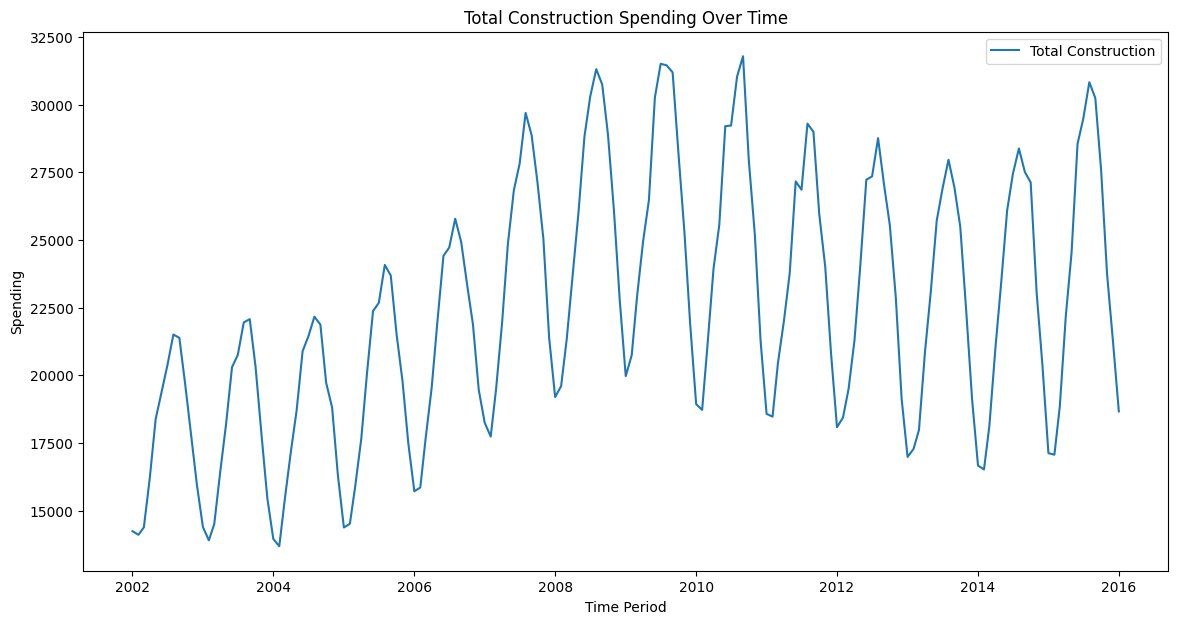

In [71]:
# Time-Series Analysis 
if 'current.public.total construction' in construction_df_cleaned.columns:
    plt.figure(figsize=(14, 7))
    plt.plot(construction_df_cleaned['time.period'], construction_df_cleaned['current.public.total construction'], label='Total Construction')
    plt.title("Total Construction Spending Over Time")
    plt.xlabel("Time Period")
    plt.ylabel("Spending")
    plt.legend()
    plt.show()

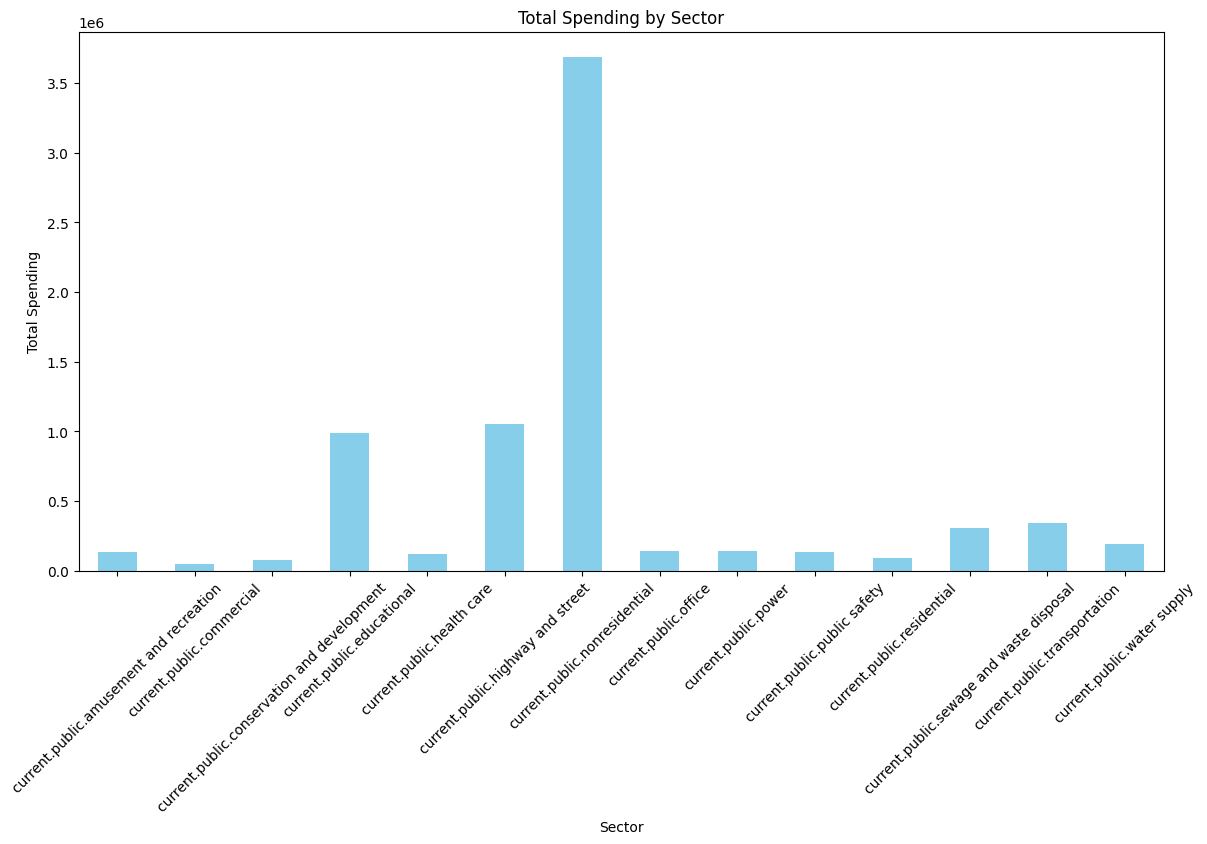

In [73]:
# Sector-Wise Total Spending
sector_columns = [col for col in construction_df_cleaned.columns if 'current.public' in col and 'total' not in col]
sector_totals = construction_df_cleaned[sector_columns].sum()

plt.figure(figsize=(14, 7))
sector_totals.plot(kind='bar', color='skyblue')
plt.title("Total Spending by Sector")
plt.xlabel("Sector")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()


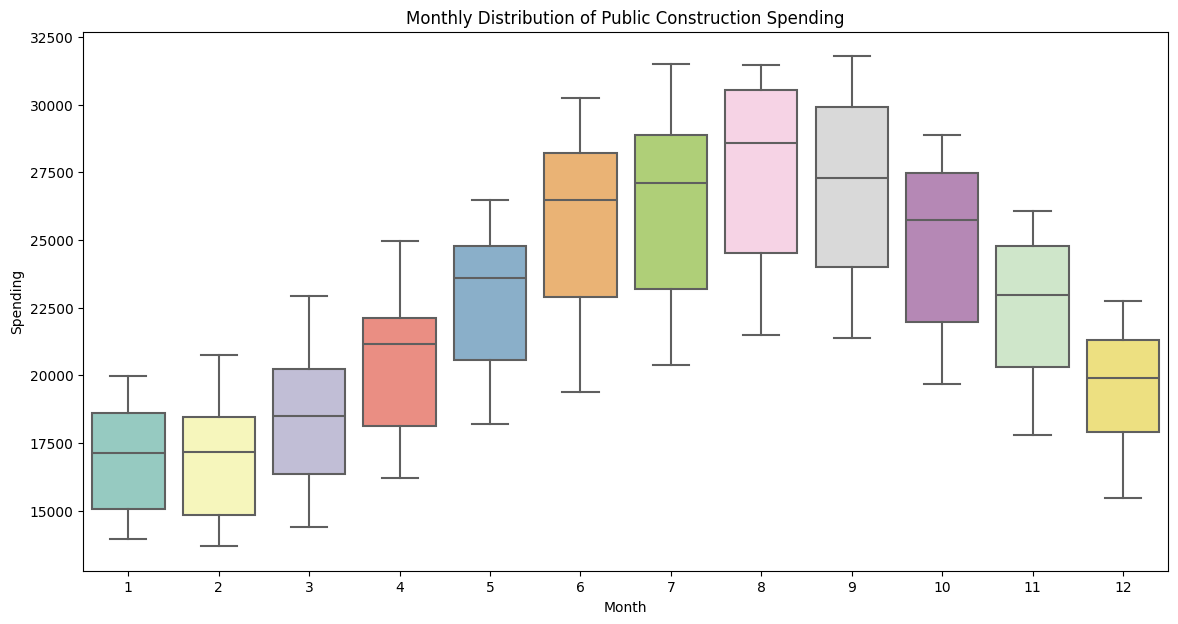

In [74]:
# Box Plot for Seasonal Analysis
if 'month' not in construction_df_cleaned.columns:
    construction_df_cleaned['month'] = construction_df_cleaned['time.period'].dt.month
plt.figure(figsize=(14, 7))
sns.boxplot(data=construction_df_cleaned, x='month', y='current.public.total construction', palette="Set3")
plt.title("Monthly Distribution of Public Construction Spending")
plt.xlabel("Month")
plt.ylabel("Spending")
plt.show()

C:\Users\DELL LATITUDE 7490\AppData\Local\Temp\ipykernel_14124\2963248563.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = construction_df_cleaned.corr()


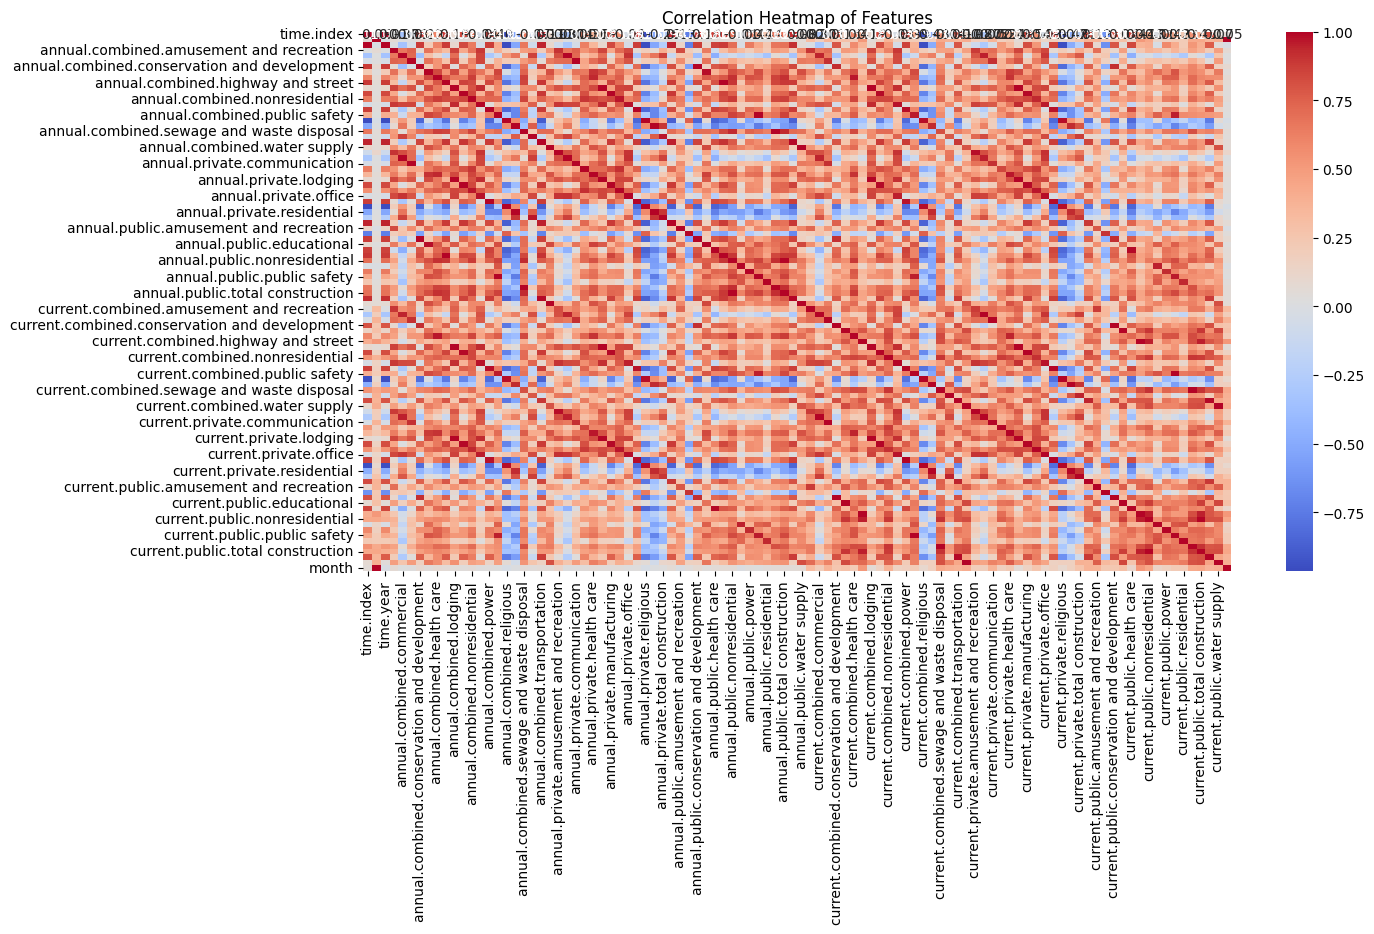

In [75]:
#Heatmap of Correlations
plt.figure(figsize=(14, 7))
correlation_matrix = construction_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


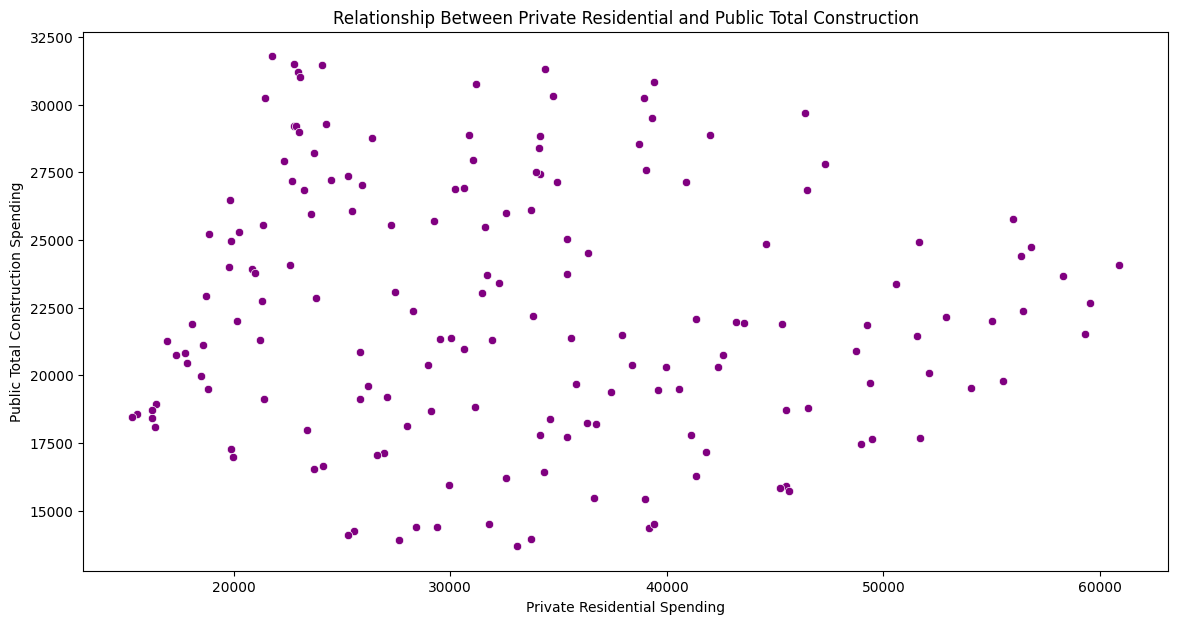

In [76]:
# Scatter Plot for Relationship Analysis
plt.figure(figsize=(14, 7))
sns.scatterplot(data=construction_df_cleaned, x='current.private.residential', y='current.public.total construction', color="purple")
plt.title("Relationship Between Private Residential and Public Total Construction")
plt.xlabel("Private Residential Spending")
plt.ylabel("Public Total Construction Spending")
plt.show()

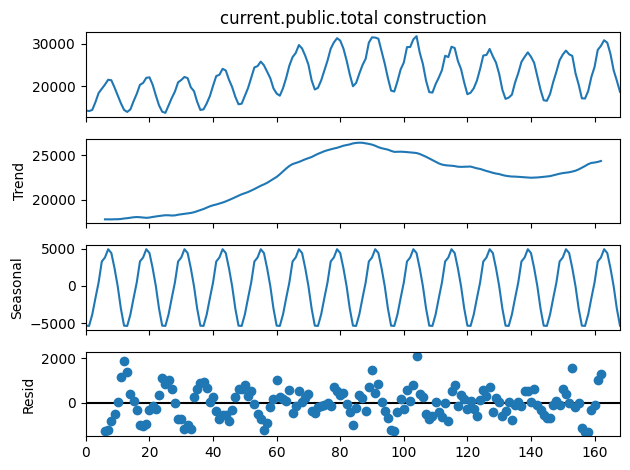

In [77]:
#Seasonal Decomposition
if 'current.public.total construction' in construction_df_cleaned.columns:
    result = seasonal_decompose(construction_df_cleaned['current.public.total construction'].dropna(), model='additive', period=12)
    result.plot()
    plt.show()


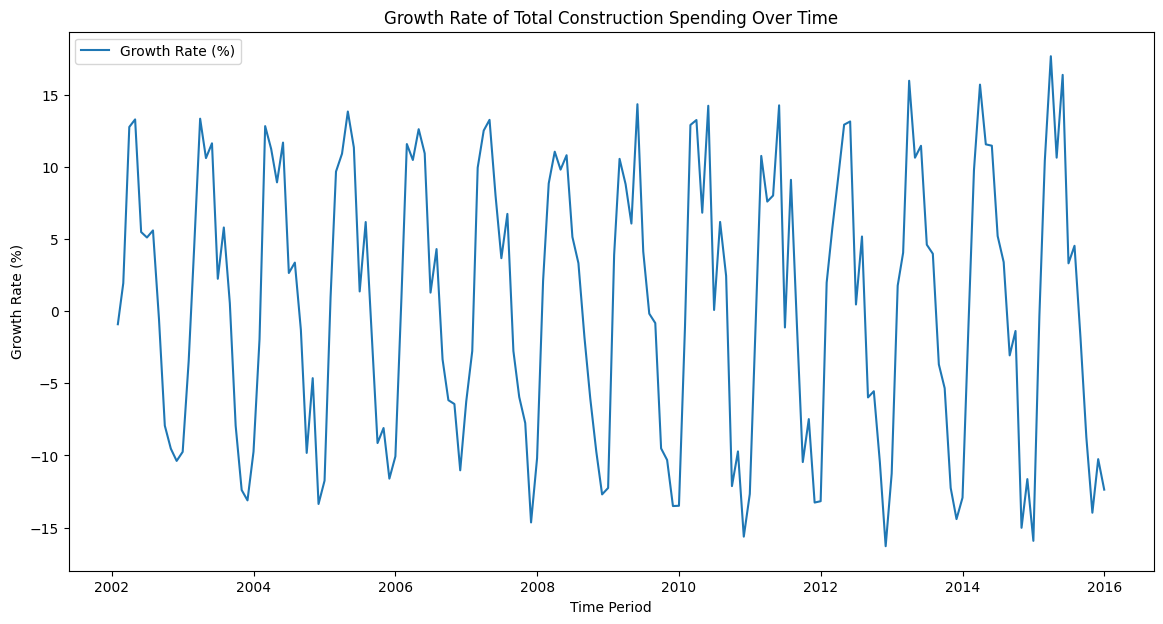

In [16]:
#Growth Rate Analysis 
if 'current.public.total construction' in construction_df_cleaned.columns:
    construction_df_cleaned['growth_rate'] = construction_df_cleaned['current.public.total construction'].pct_change() * 100
    plt.figure(figsize=(14, 7))
    plt.plot(construction_df_cleaned['time.period'], construction_df_cleaned['growth_rate'], label='Growth Rate (%)')
    plt.title("Growth Rate of Total Construction Spending Over Time")
    plt.xlabel("Time Period")
    plt.ylabel("Growth Rate (%)")
    plt.legend()
    plt.show()

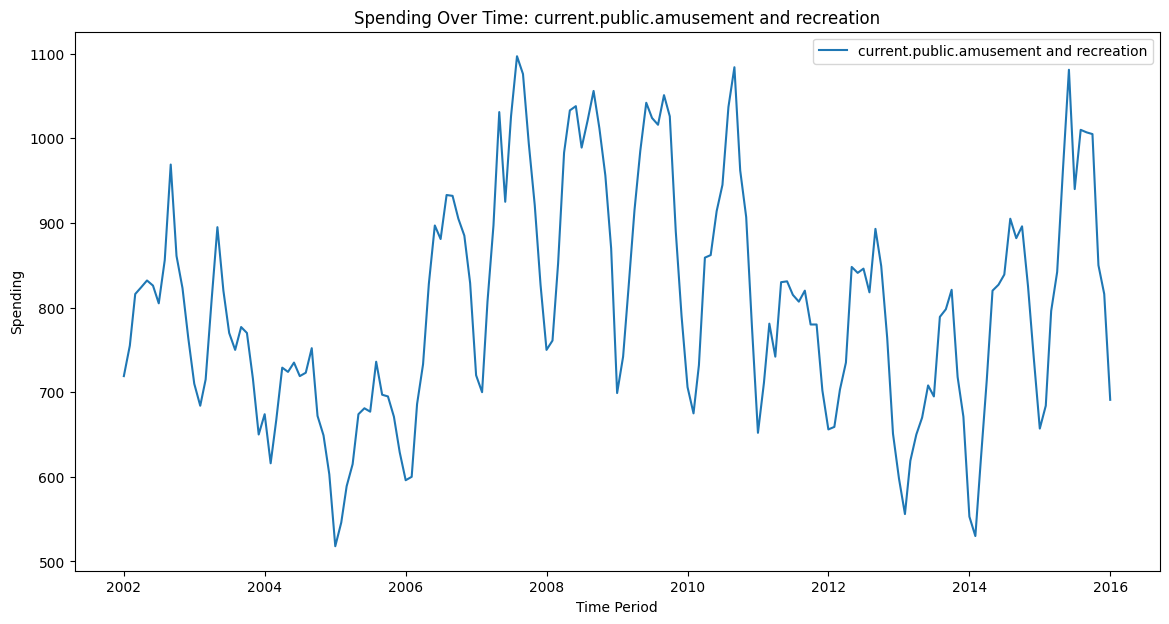

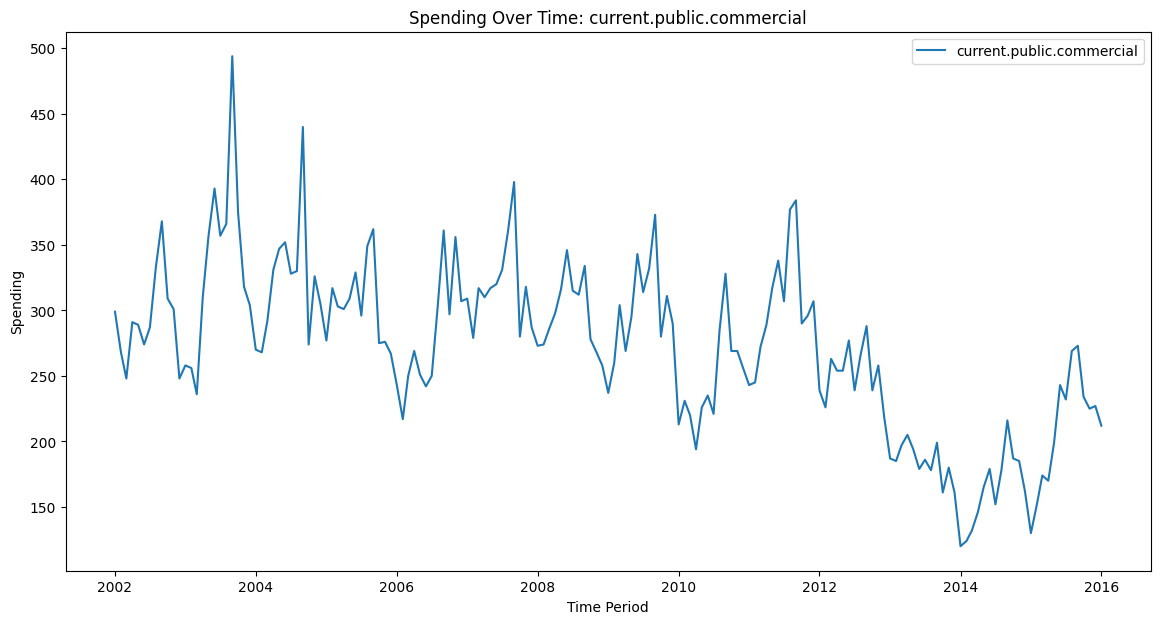

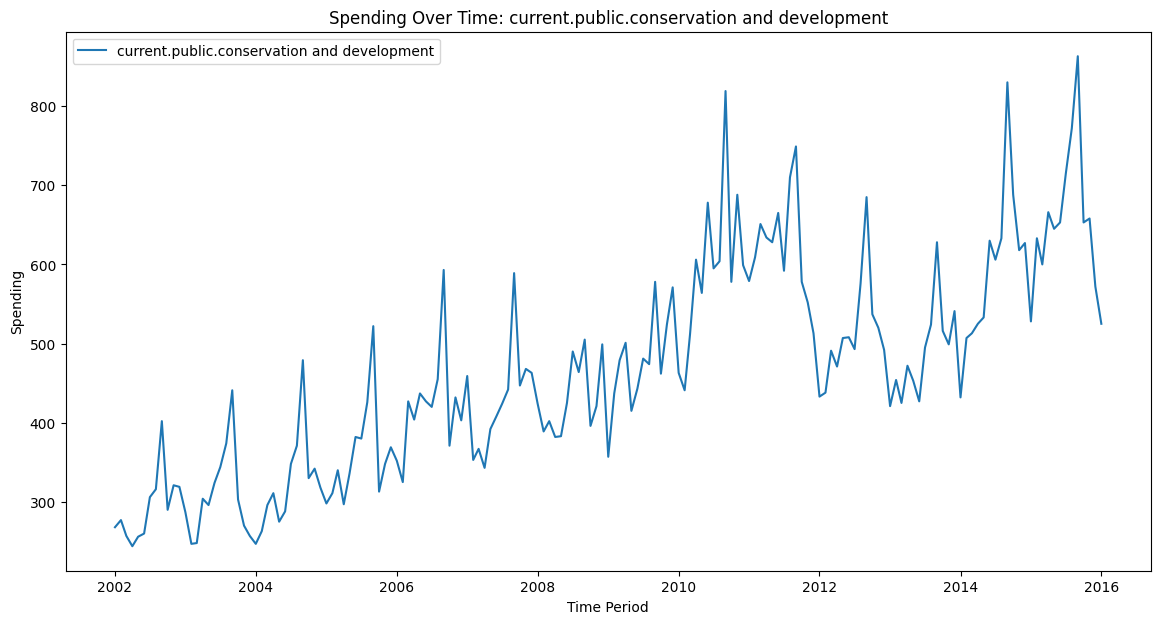

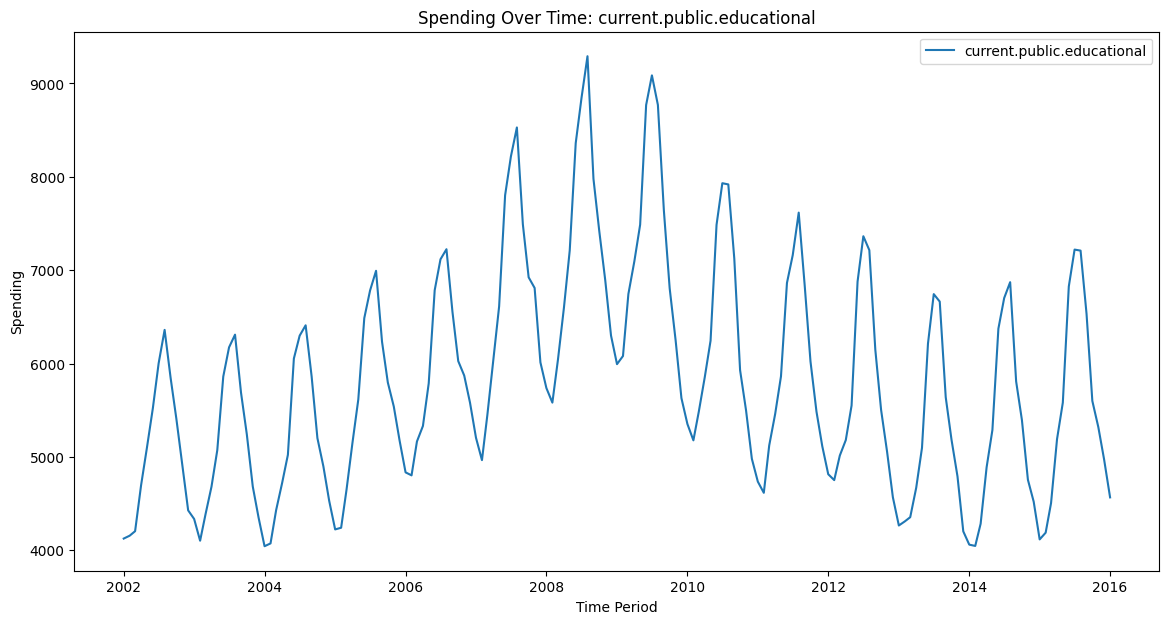

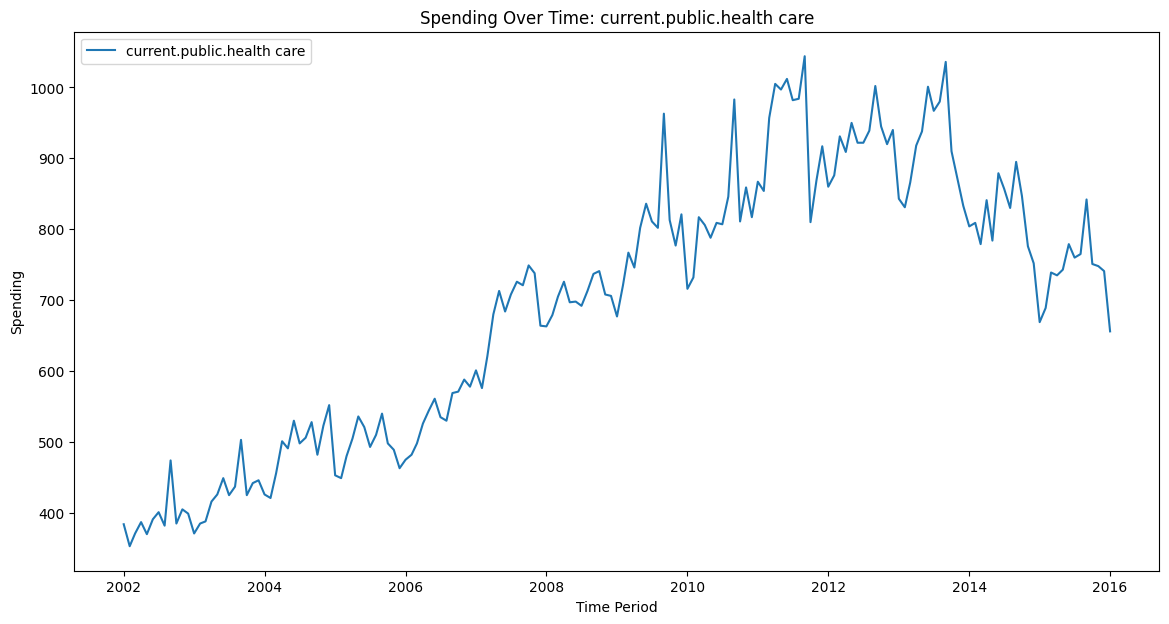

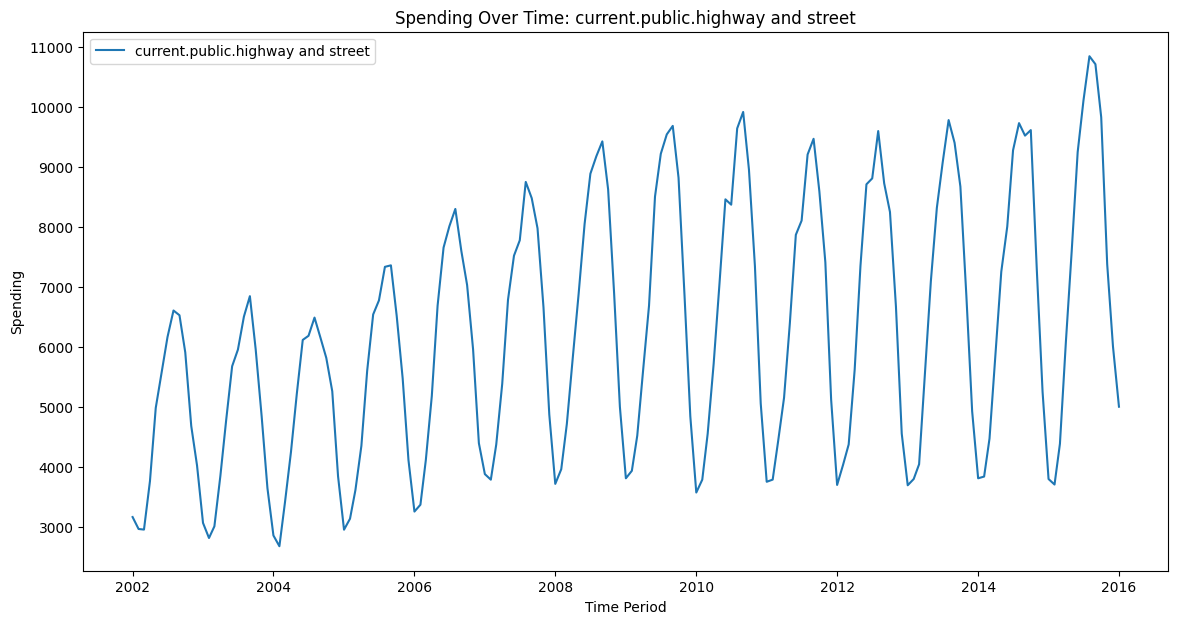

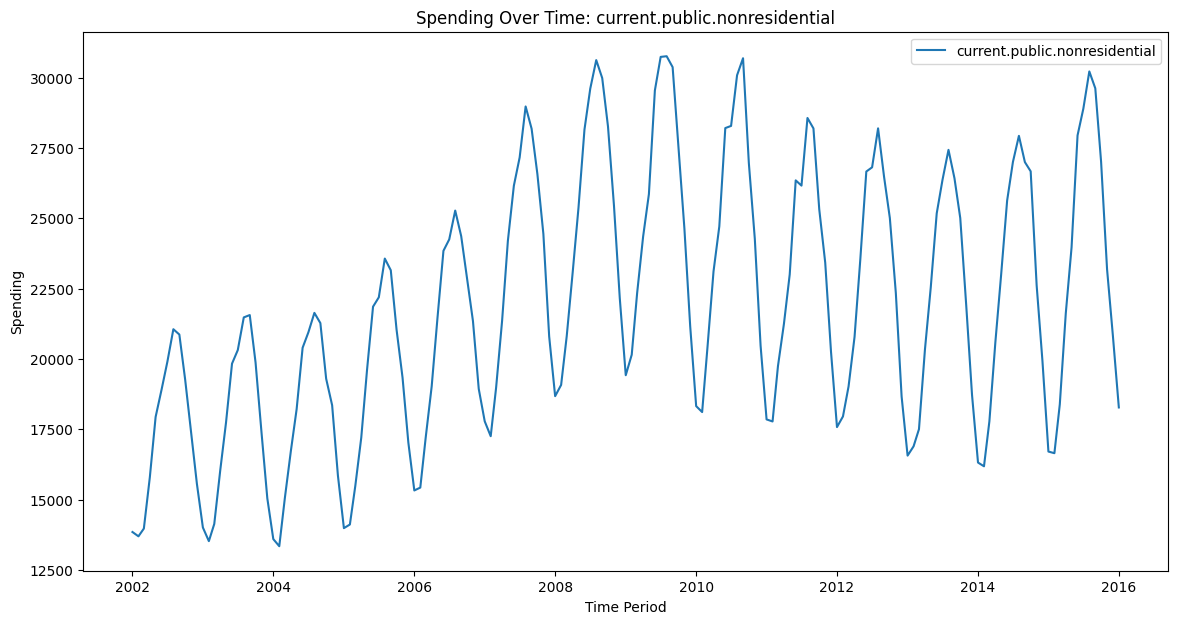

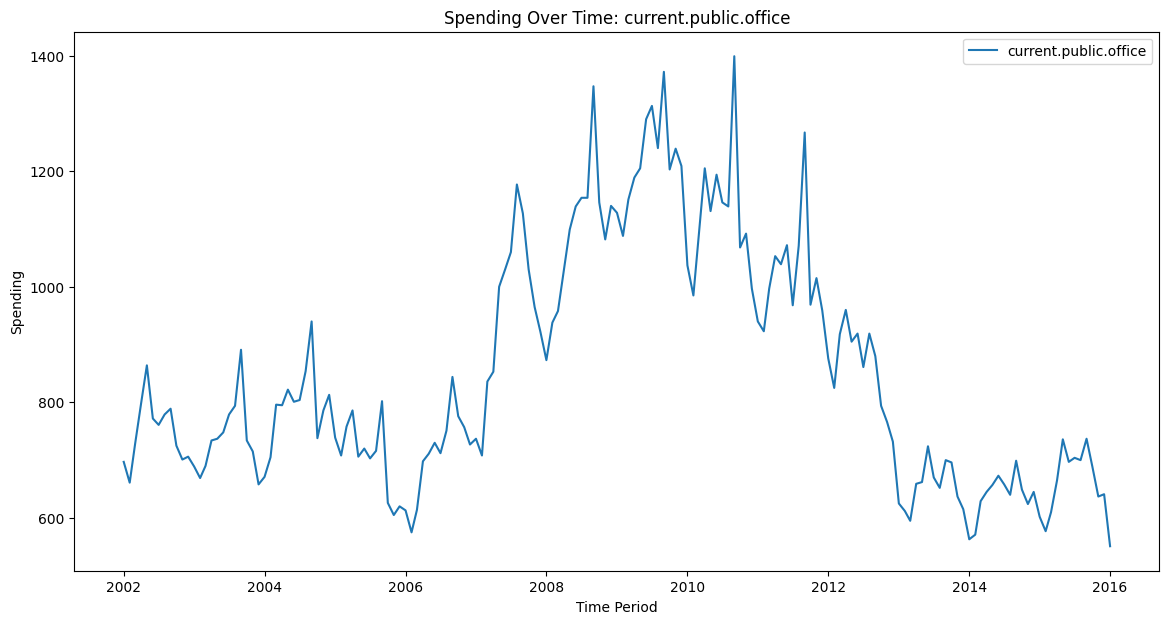

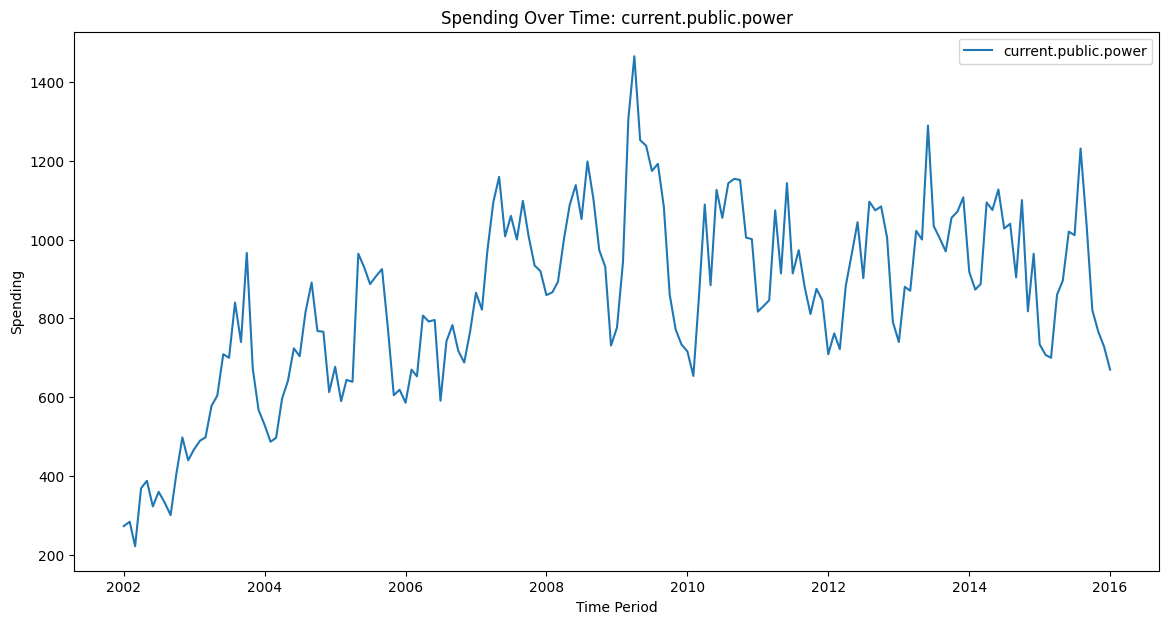

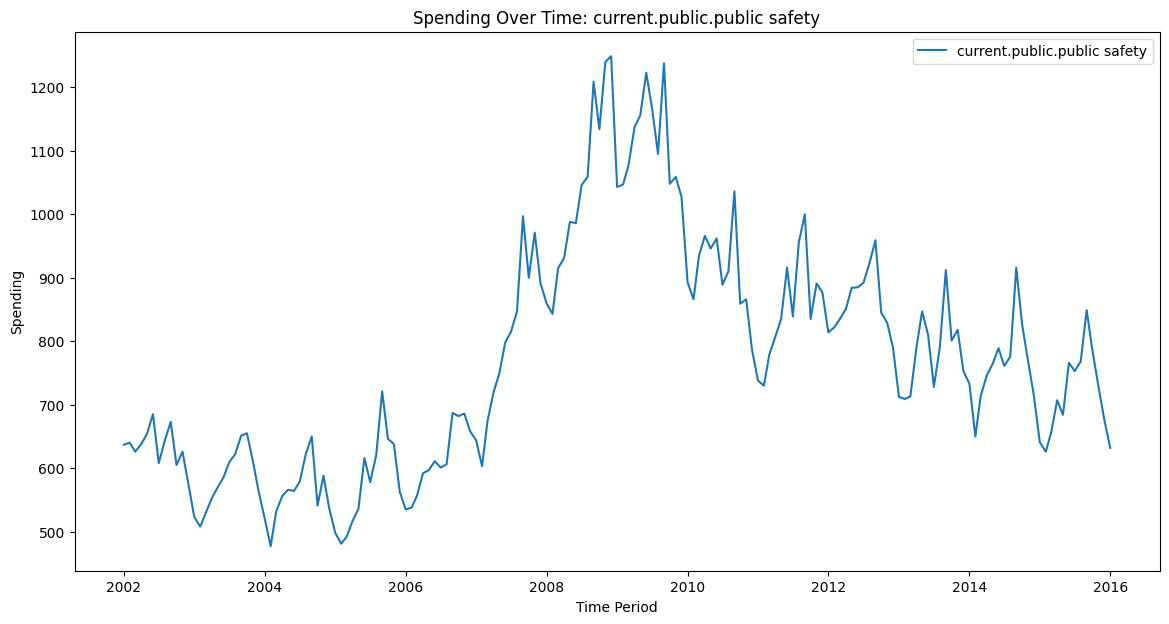

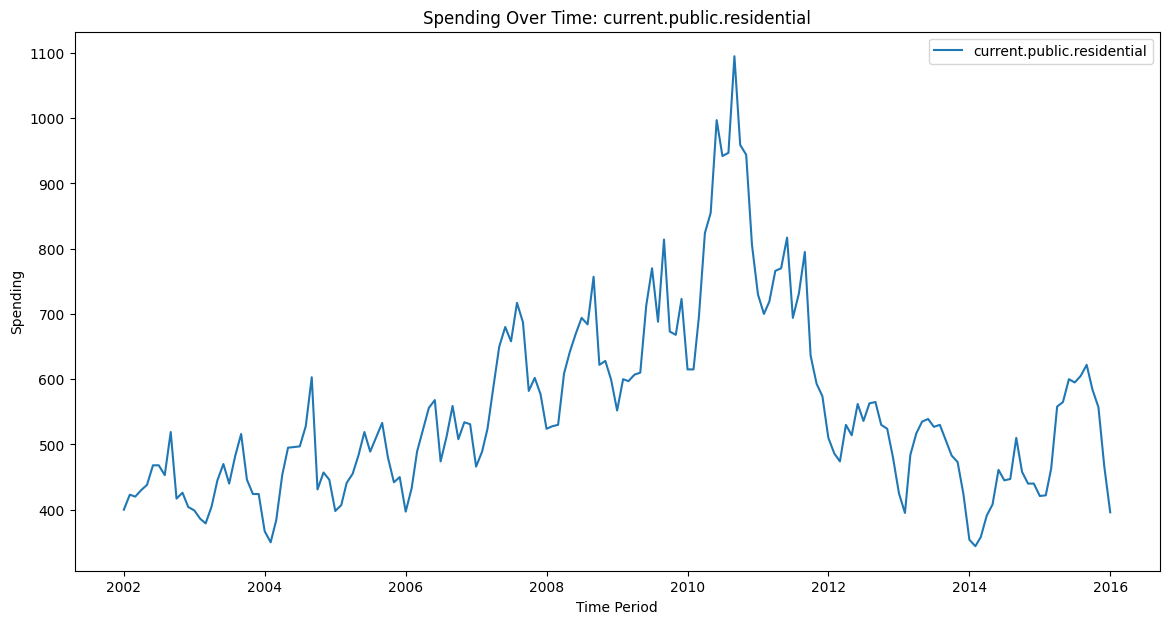

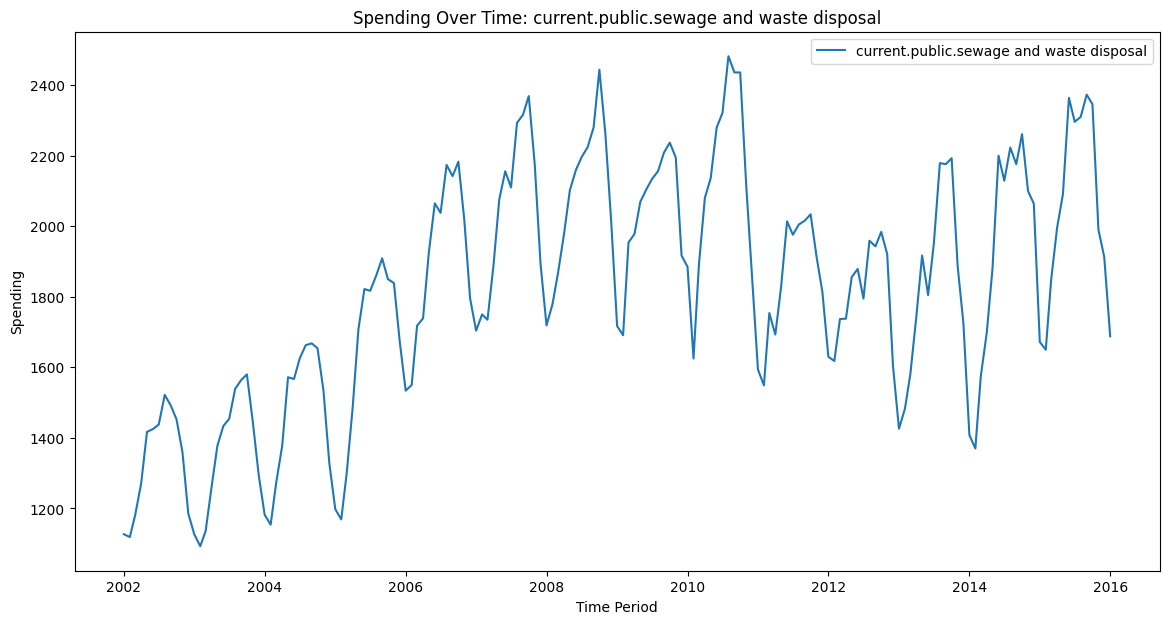

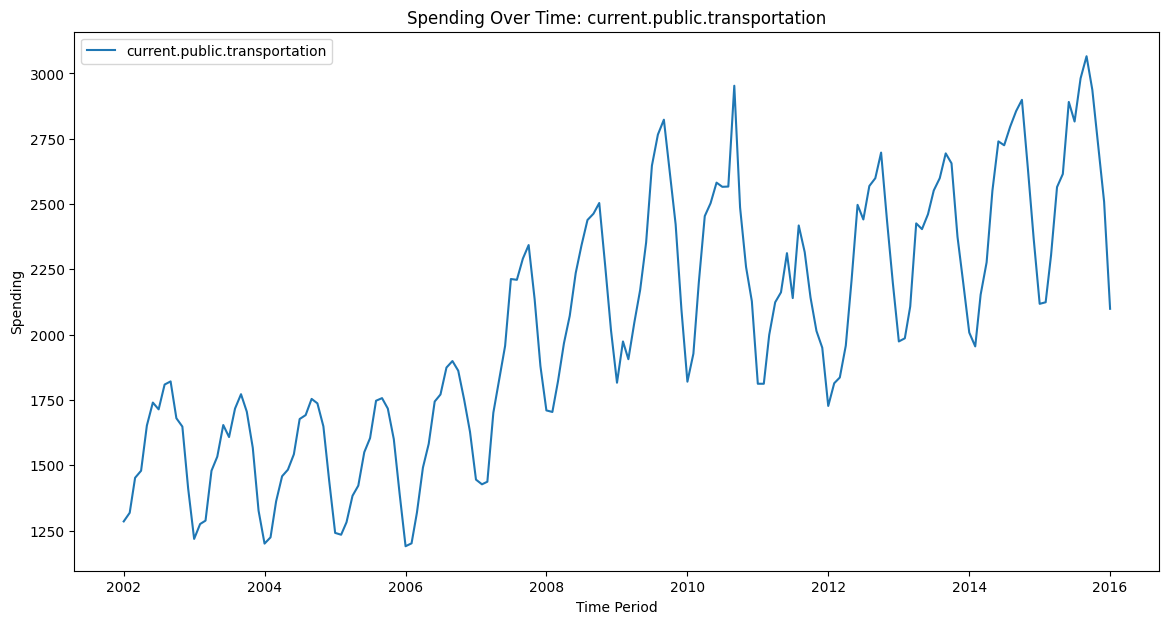

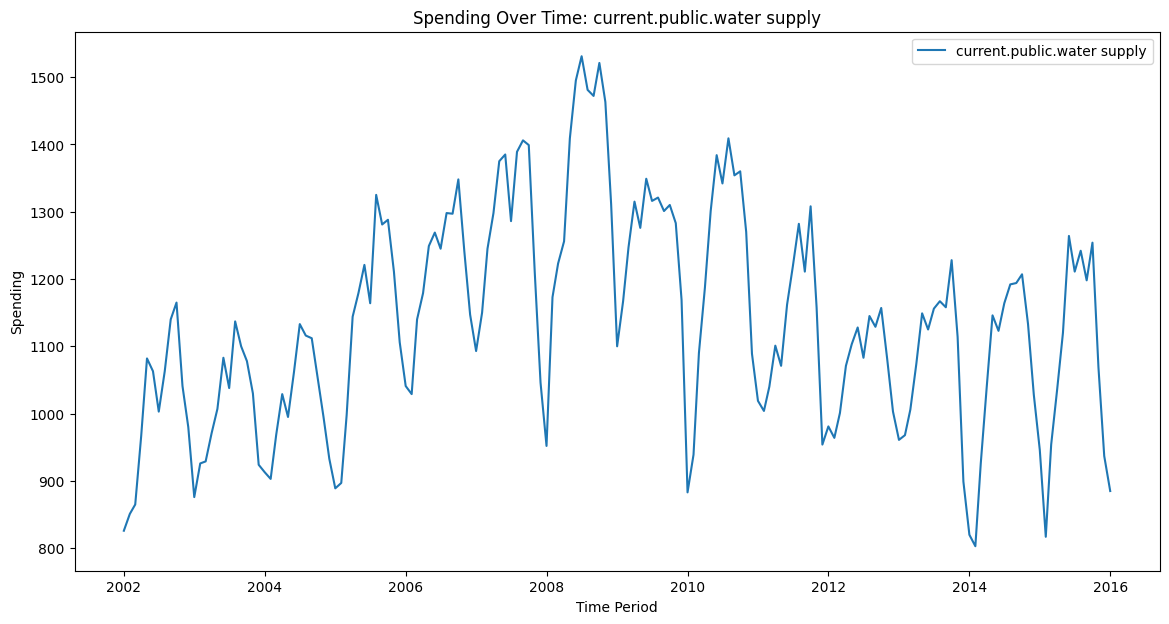

In [78]:
# Sector Spending Over Time
for col in sector_columns:
    plt.figure(figsize=(14, 7))
    plt.plot(construction_df_cleaned['time.period'], construction_df_cleaned[col], label=col)
    plt.title(f"Spending Over Time: {col}")
    plt.xlabel("Time Period")
    plt.ylabel("Spending")
    plt.legend()
    plt.show()

FEATURE ENGINEERING

In [79]:
construction_df_cleaned['time.period'] = pd.to_datetime(construction_df_cleaned['time.period'], errors='coerce')
construction_df_cleaned = construction_df_cleaned.dropna(subset=['time.period'])
construction_df_cleaned.reset_index(drop=True, inplace=True)

In [81]:
#Time-Based Features
construction_df_cleaned['year'] = construction_df_cleaned['time.period'].dt.year
construction_df_cleaned['month'] = construction_df_cleaned['time.period'].dt.month
construction_df_cleaned['quarter'] = construction_df_cleaned['time.period'].dt.quarter
construction_df_cleaned['day_of_year'] = construction_df_cleaned['time.period'].dt.dayofyear
construction_df_cleaned['week_of_year'] = construction_df_cleaned['time.period'].dt.isocalendar().week

#Lagged Features
if 'current.public.total construction' in construction_df_cleaned.columns:
    construction_df_cleaned['lag_1'] = construction_df_cleaned['current.public.total construction'].shift(1)
    construction_df_cleaned['lag_2'] = construction_df_cleaned['current.public.total construction'].shift(2)
    construction_df_cleaned['lag_3'] = construction_df_cleaned['current.public.total construction'].shift(3)

#Rolling Averages
if 'current.public.total construction' in construction_df_cleaned.columns:
    construction_df_cleaned['rolling_mean_3'] = construction_df_cleaned['current.public.total construction'].rolling(window=3).mean()
    construction_df_cleaned['rolling_mean_6'] = construction_df_cleaned['current.public.total construction'].rolling(window=6).mean()

#Growth Rates
if 'current.public.total construction' in construction_df_cleaned.columns:
    construction_df_cleaned['growth_rate_total'] = construction_df_cleaned['current.public.total construction'].pct_change()

#Sector Ratios
sector_columns = [col for col in construction_df_cleaned.columns if 'current.public' in col and 'total' not in col]
for col in sector_columns:
    construction_df_cleaned[f'{col}_ratio'] = construction_df_cleaned[col] / construction_df_cleaned['current.public.total construction']

#Sector Growth Rates
for col in sector_columns:
    construction_df_cleaned[f'{col}_growth_rate'] = construction_df_cleaned[col].pct_change()

#Seasonality Indicators
construction_df_cleaned['is_winter'] = construction_df_cleaned['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)
construction_df_cleaned['is_summer'] = construction_df_cleaned['month'].apply(lambda x: 1 if x in [6, 7, 8] else 0)

#Cyclic Features (Sine and Cosine Transformation for Month)
construction_df_cleaned['month_sin'] = np.sin(2 * np.pi * construction_df_cleaned['month'] / 12)
construction_df_cleaned['month_cos'] = np.cos(2 * np.pi * construction_df_cleaned['month'] / 12)


construction_df_cleaned = construction_df_cleaned.dropna()


construction_df_cleaned.reset_index(drop=True, inplace=True)

In [82]:
print(f"Feature Engineering Complete. Dataset now has {construction_df_cleaned.shape[1]} columns and {construction_df_cleaned.shape[0]} rows.")


Feature Engineering Complete. Dataset now has 200 columns and 159 rows.


In [83]:
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

if 'time.month' in construction_df_cleaned.columns:
    construction_df_cleaned['time.month name'] = construction_df_cleaned['time.month'].map(month_mapping)


In [84]:
# Mapping month names to integers for cyclic encoding
month_to_int_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

if 'time.month name' in construction_df_cleaned.columns:
    construction_df_cleaned['time.month numeric'] = construction_df_cleaned['time.month name'].map(month_to_int_mapping)
    construction_df_cleaned['month_sin'] = np.sin(2 * np.pi * construction_df_cleaned['time.month numeric'] / 12)
    construction_df_cleaned['month_cos'] = np.cos(2 * np.pi * construction_df_cleaned['time.month numeric'] / 12)
    
    construction_df_cleaned.drop(columns=['time.month name', 'time.month numeric'], inplace=True)


In [85]:
#one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [97]:
target_column = 'current.public.total construction' 
features = [col for col in construction_df_cleaned.columns if col not in ['time.period', target_column]]

X = construction_df_cleaned[features]
y = construction_df_cleaned[target_column]


train_data = construction_df_cleaned[construction_df_cleaned['time.period'] < '2015-01-01']
test_data = construction_df_cleaned[construction_df_cleaned['time.period'] >= '2015-01-01']

X_train = train_data[features]
y_train = train_data[target_column]
X_test = test_data[features]
y_test = test_data[target_column]


In [116]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

if 'target' not in construction_df_cleaned.columns:
    if 'current.public.total construction' in construction_df_cleaned.columns:
        construction_df_cleaned.rename(columns={'current.public.total construction': 'target'}, inplace=True)
    else:
        raise ValueError("Target column 'target' is missing. Please specify the correct target column.")

numeric_cols = construction_df_cleaned.select_dtypes(include=[np.number]).columns
construction_df_cleaned[numeric_cols] = construction_df_cleaned[numeric_cols].fillna(construction_df_cleaned[numeric_cols].mean())
construction_df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

features = [col for col in construction_df_cleaned.columns if col not in ['time.period', 'target']]
X = construction_df_cleaned[features]
y = construction_df_cleaned['target']

train_data = construction_df_cleaned[construction_df_cleaned['time.period'] < '2015-01-01']
test_data = construction_df_cleaned[construction_df_cleaned['time.period'] >= '2015-01-01']

X_train = train_data[features]
y_train = train_data['target']
X_test = test_data[features]
y_test = test_data['target']

time_periods_test = test_data['time.period'].reset_index(drop=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

predictions_df = pd.DataFrame({
    'time.period': time_periods_test,
    'predictions': y_pred
})

print(predictions_df)


   time.period   predictions
0   2015-01-01  16959.210938
1   2015-02-01  16957.201172
2   2015-03-01  18814.625000
3   2015-04-01  22102.826172
4   2015-05-01  24397.066406
5   2015-06-01  28424.728516
6   2015-07-01  29291.089844
7   2015-08-01  31151.519531
8   2015-09-01  30348.306641
9   2015-10-01  27819.357422
10  2015-11-01  23685.277344
11  2015-12-01  21317.837891
12  2016-01-01  18611.281250


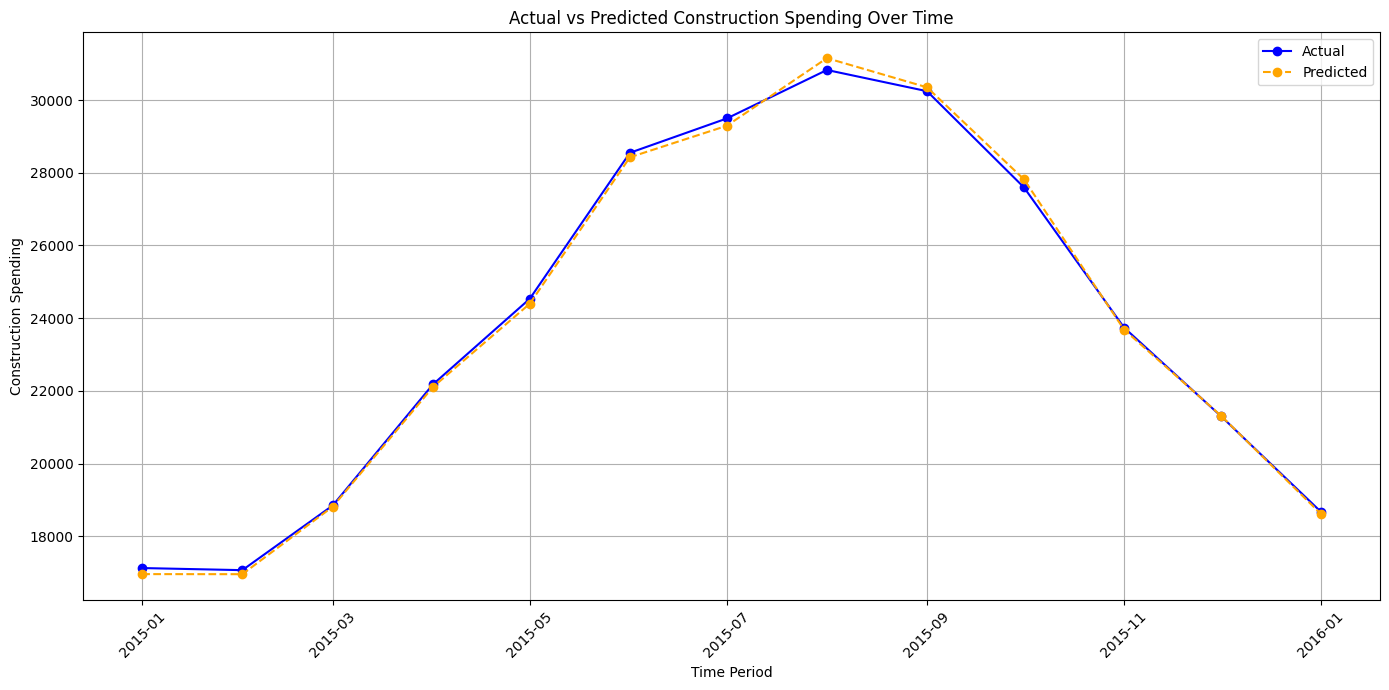

In [120]:
comparison_df = pd.DataFrame({
    'time.period': time_periods_test,
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred
})

plt.figure(figsize=(14, 7))
plt.plot(comparison_df['time.period'], comparison_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(comparison_df['time.period'], comparison_df['Predicted'], label='Predicted', marker='o', linestyle='--', color='orange')
plt.title("Actual vs Predicted Construction Spending Over Time")
plt.xlabel("Time Period")
plt.ylabel("Construction Spending")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 124.97806490384616
Root Mean Squared Error (RMSE): 150.36113787275914
R-squared (R²): 0.9990527969155075


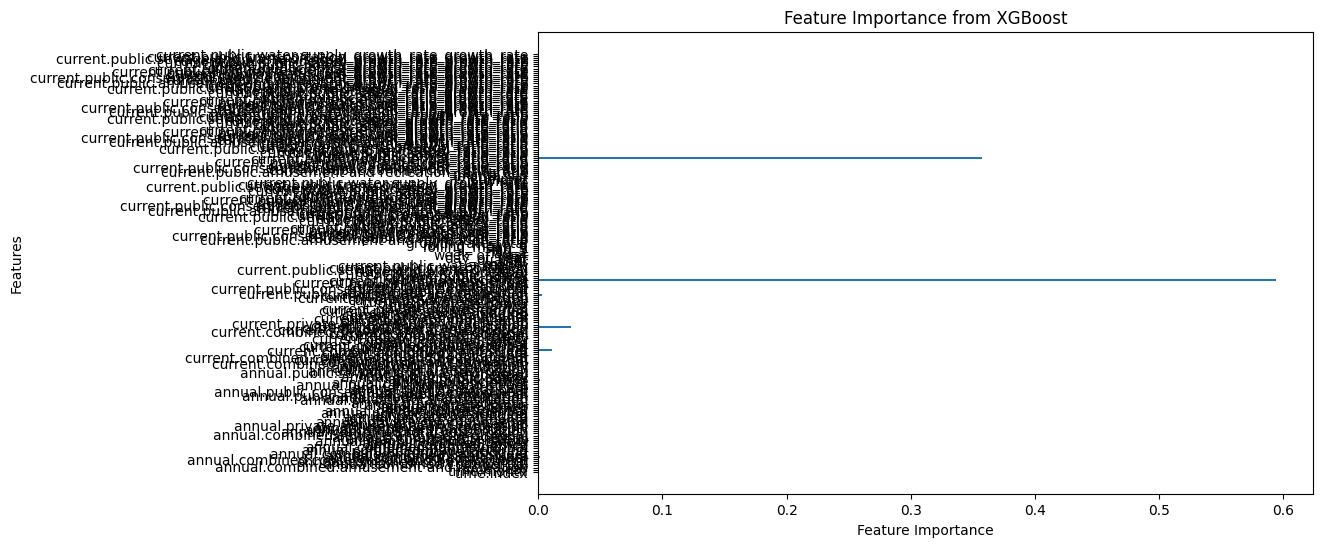

In [118]:
#  feature importance
feature_importances = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from XGBoost")
plt.show()
